SEABORN PACKAGE

Seaborn is a Python data visualization library based on matplotlib.
It provides a high-level interface for drawing attractive and informative statistical graphics.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle as pk
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import VarianceThreshold

In [ ]:
! wget https://github.com/Abdul-Aziz-Mustafa/Discovery-Potion/blob/main/CSV_files/acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv

--2022-05-16 21:22:46--  https://github.com/Abdul-Aziz-Mustafa/Discovery-Potion/blob/main/CSV_files/acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv.1’

acetylcholinesteras     [ <=>                ] 131.47K  --.-KB/s    in 0.07s   

2022-05-16 21:22:47 (1.72 MB/s) - ‘acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv.1’ saved [134628]



In [ ]:
pubchem_data = pd.read_csv('acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv')
print("Pubchem data:")
print(pubchem_data)

Pubchem data:
      PubchemFP0  PubchemFP1  PubchemFP2  PubchemFP3  PubchemFP4  PubchemFP5  \
0              1           1           1           0           0           0   
1              1           1           1           0           0           0   
2              1           1           1           0           0           0   
3              1           1           0           0           0           0   
4              1           1           0           0           0           0   
...          ...         ...         ...         ...         ...         ...   
4690           1           1           1           1           0           0   
4691           1           1           1           1           0           0   
4692           1           1           1           1           0           0   
4693           1           1           1           1           0           0   
4694           1           1           1           1           0           0   

      PubchemFP6  Pubchem

In [ ]:
X_axis = pubchem_data.drop('pIC50', axis=1)
print(X_axis)

      PubchemFP0  PubchemFP1  PubchemFP2  PubchemFP3  PubchemFP4  PubchemFP5  \
0              1           1           1           0           0           0   
1              1           1           1           0           0           0   
2              1           1           1           0           0           0   
3              1           1           0           0           0           0   
4              1           1           0           0           0           0   
...          ...         ...         ...         ...         ...         ...   
4690           1           1           1           1           0           0   
4691           1           1           1           1           0           0   
4692           1           1           1           1           0           0   
4693           1           1           1           1           0           0   
4694           1           1           1           1           0           0   

      PubchemFP6  PubchemFP7  PubchemFP

In [ ]:
Y_axis = pubchem_data.pIC50
print(Y_axis)

0       6.124939
1       7.000000
2       4.301030
3       6.522879
4       6.096910
          ...   
4690    5.612610
4691    5.595166
4692    5.419075
4693    5.460924
4694    5.555955
Name: pIC50, Length: 4695, dtype: float64


In [ ]:
selection = VarianceThreshold(threshold=(0.16))    
X_axis = selection.fit_transform(X_axis)
print("Low varience removed X features")
print(X_axis)

Low varience removed X features
[[0 1 1 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 1 1 ... 0 0 0]
 ...
 [1 1 0 ... 0 1 0]
 [1 1 0 ... 0 1 0]
 [1 1 0 ... 0 1 0]]


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_axis, Y_axis, test_size=0.2)
print("X trining")
print(X_train.shape)
print("X testing")
print(X_test.shape)
print("Y training")
print(Y_train.shape)
print("Y testing")
print(Y_test.shape)

X trining
(3756, 137)
X testing
(939, 137)
Y training
(3756,)
Y testing
(939,)


In [ ]:
reg_model = RandomForestRegressor(n_estimators=100)
reg_model.fit(X_train, Y_train)
R2 = reg_model.score(X_test, Y_test)
print("Regression Model's R squared value:")
print(R2)

Regression Model
0.54109540119196


In [ ]:
Y_pred = reg_model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.show>

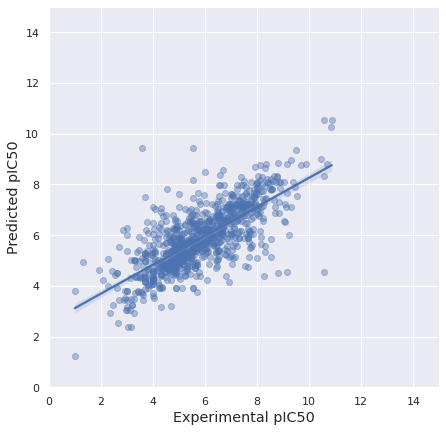

In [ ]:
plot = sns.regplot(Y_test, Y_pred, scatter_kws={'alpha':0.4})
plot.set_xlabel('Experimental pIC50', fontsize='large')
plot.set_ylabel('Predicted pIC50', fontsize='large')
plot.set_xlim(0, 15)
plot.set_ylim(0, 15)
plot.figure.set_size_inches(7, 7)
plt.show

In [ ]:
pk.dump(reg_model,open('acetylcholinesterase_model.pkl','wb'))